In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np 
import pandas as pd
import os
import cv2
from tqdm import tqdm
from random import shuffle
import pickle
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

IMG_SHAPE = 224

datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range = 40,
    zoom_range = 0.2,
    horizontal_flip = True
    )

train_generator = datagen.flow_from_directory(
        'drive/MyDrive/dog-breed-identification/train_labeled',
        target_size=(IMG_SHAPE, IMG_SHAPE),
        batch_size=32,
        class_mode='categorical',
        seed=42,
        shuffle=True,)
        

validation_generator = datagen.flow_from_directory(
        'drive/MyDrive/dog-breed-identification/valid_folders',
        target_size=(IMG_SHAPE, IMG_SHAPE),
        batch_size=32,
        class_mode='categorical',
        seed=42,
        shuffle=True,) 

Mounted at /content/drive
Found 10222 images belonging to 120 classes.
Found 1680 images belonging to 120 classes.


In [ ]:
model = tf.keras.models.load_model('mymodel.h5')

In [ ]:
resnet50 = model.fit(train_generator,validation_data = validation_generator,epochs = 20,steps_per_epoch = 200)

Epoch 1/20
200/200 [==============================] - 1748s 9s/step - loss: 0.2349 - accuracy: 0.9269 - val_loss: 0.2523 - val_accuracy: 0.9268
Epoch 2/20
200/200 [==============================] - 604s 3s/step - loss: 0.2654 - accuracy: 0.9193 - val_loss: 0.2308 - val_accuracy: 0.9274
Epoch 3/20
200/200 [==============================] - 306s 2s/step - loss: 0.2397 - accuracy: 0.9270 - val_loss: 0.2303 - val_accuracy: 0.9274
Epoch 4/20
200/200 [==============================] - 203s 1s/step - loss: 0.2235 - accuracy: 0.9300 - val_loss: 0.2429 - val_accuracy: 0.9292
Epoch 5/20
200/200 [==============================] - 170s 849ms/step - loss: 0.2161 - accuracy: 0.9315 - val_loss: 0.2184 - val_accuracy: 0.9280
Epoch 6/20
200/200 [==============================] - 157s 787ms/step - loss: 0.2341 - accuracy: 0.9276 - val_loss: 0.1980 - val_accuracy: 0.9411
Epoch 7/20
200/200 [==============================] - 151s 753ms/step - loss: 0.2267 - accuracy: 0.9306 - val_loss: 0.1907 - val_accura

In [ ]:
model.save("mymodel.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
resnet50 = model.fit(train_generator,validation_data = validation_generator,epochs = 20,steps_per_epoch = 200)

Epoch 1/20
200/200 [==============================] - 147s 737ms/step - loss: 0.1329 - accuracy: 0.9584 - val_loss: 0.1208 - val_accuracy: 0.9607
Epoch 2/20
200/200 [==============================] - 146s 730ms/step - loss: 0.1428 - accuracy: 0.9549 - val_loss: 0.1367 - val_accuracy: 0.9565
Epoch 3/20
200/200 [==============================] - 147s 733ms/step - loss: 0.1367 - accuracy: 0.9589 - val_loss: 0.1254 - val_accuracy: 0.9649
Epoch 4/20
200/200 [==============================] - 146s 728ms/step - loss: 0.1308 - accuracy: 0.9589 - val_loss: 0.1133 - val_accuracy: 0.9643
Epoch 5/20
200/200 [==============================] - 147s 734ms/step - loss: 0.1285 - accuracy: 0.9592 - val_loss: 0.1263 - val_accuracy: 0.9649
Epoch 6/20
200/200 [==============================] - 147s 736ms/step - loss: 0.1449 - accuracy: 0.9589 - val_loss: 0.1297 - val_accuracy: 0.9565
Epoch 7/20
200/200 [==============================] - 141s 704ms/step - loss: 0.1370 - accuracy: 0.9553 - val_loss: 0.1168 -

In [ ]:
model.save("mymodel.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


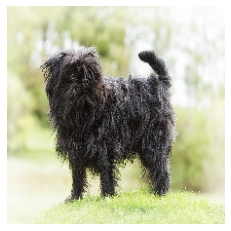

In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img) 
    img_tensor = np.expand_dims(img_tensor, axis=0)      
    img_tensor /= 255.   
    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()
    return img_tensor

img_path = 'drive/MyDrive/dog-breed-identification/affenpinscher.jpg' 
new_image = load_image(img_path, True)

In [ ]:
pred = model(new_image)

In [ ]:
tf.math.argmax(pred, axis = 1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>

In [ ]:
import pandas as pd
path_labels = 'drive/MyDrive/dog-breed-identification/dogs_id_guja.csv'
df = pd.read_csv(path_labels)
CATEGORIES = df.columns.tolist()[1:]


In [ ]:
CATEGORIES[0]

'affenpinscher'

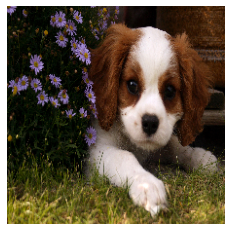

In [ ]:
img_path = 'drive/MyDrive/dog-breed-identification/Cute_dog.jpg' 
new_image = load_image(img_path, True)
pred = model(new_image)

In [ ]:
tf.math.argmax(pred, axis = 1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([13])>

In [ ]:
CATEGORIES[13]

'blenheim_spaniel'

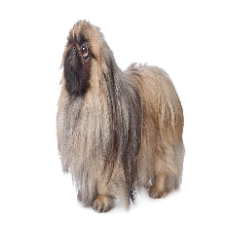

In [ ]:
img_path = 'drive/MyDrive/dog-breed-identification/pekinese.jpg' 
new_image = load_image(img_path, True)
pred = model(new_image)

In [ ]:
tf.math.argmax(pred, axis = 1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([85])>

In [ ]:
CATEGORIES[85]

'pekinese'

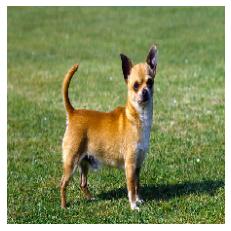

In [ ]:
img_path = 'drive/MyDrive/dog-breed-identification/Chihuahua.jpg' 
new_image = load_image(img_path, True)
pred = model(new_image)

In [ ]:
tf.math.argmax(pred, axis = 1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([29])>

In [ ]:
CATEGORIES[29]

'chihuahua'